In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await fetch(URL)
# boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df = pd.read_csv(URL)

In [3]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


# Task 2

1. For the "Median value of owner-occupied homes" provide a boxplot

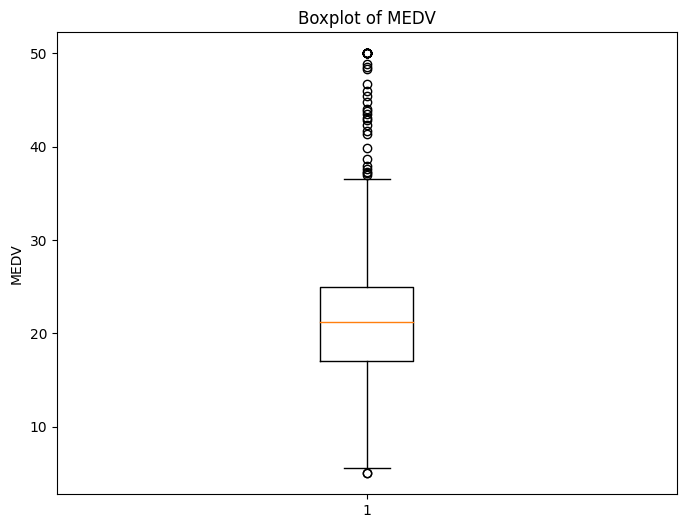

In [4]:
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of MEDV')
plt.ylabel('MEDV')
plt.show()

2. Provide a  bar plot for the Charles river variable

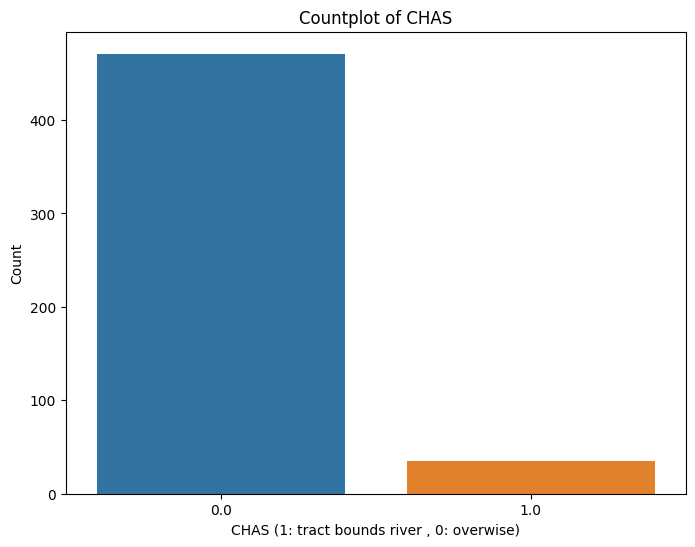

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=boston_df, x='CHAS')
plt.title('Countplot of CHAS')
plt.xlabel('CHAS (1: tract bounds river , 0: overwise)')
plt.ylabel('Count')
plt.show()

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<Figure size 800x600 with 0 Axes>

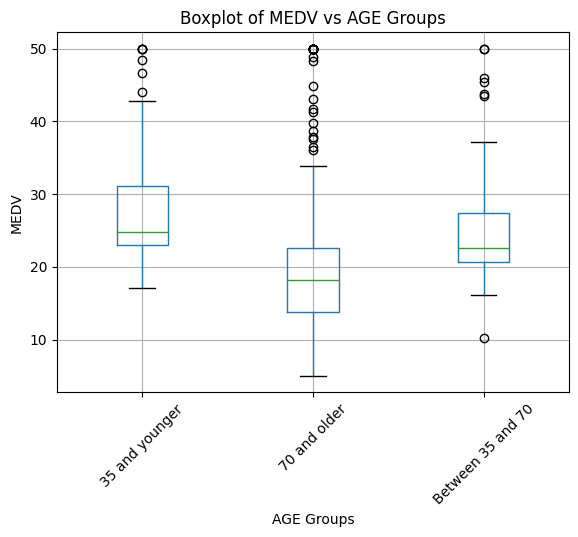

In [6]:
# Discretizing column AGE into three groups
def discretize_AGE(x):
    if x < 35:
        return '35 and younger'
    elif 35 <= x < 70:
        return 'Between 35 and 70'
    else:
        return '70 and older'

boston_df['AGE_group'] = boston_df['AGE'].apply(discretize_AGE)

# Plotting boxplot of A vs B groups
plt.figure(figsize=(8, 6))
boston_df.boxplot(column='MEDV', by='AGE_group')
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('AGE Groups')
plt.ylabel('MEDV')
plt.suptitle('')  # Remove default title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

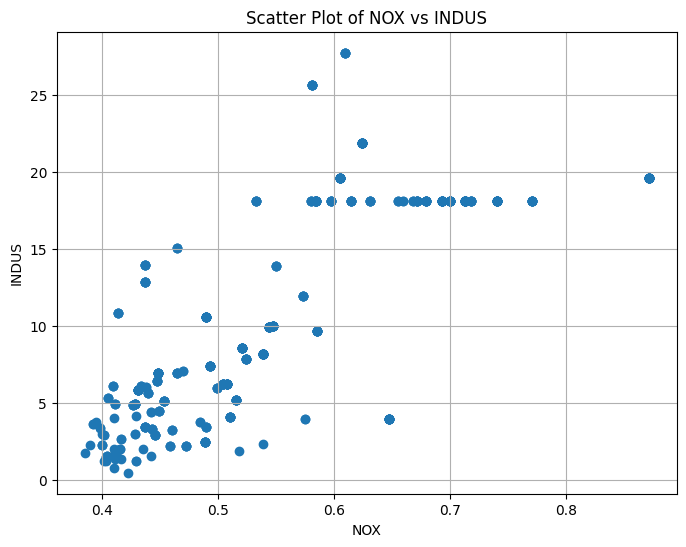

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.grid(True)
plt.show()

We can observe that NOX and INDUS has positive correlation. To verify it, we do the following.

In [8]:
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print("Correlation between NOX and INDUS:", correlation)

Correlation between NOX and INDUS: 0.763651446920914


5. Create a histogram for the pupil to teacher ratio variable

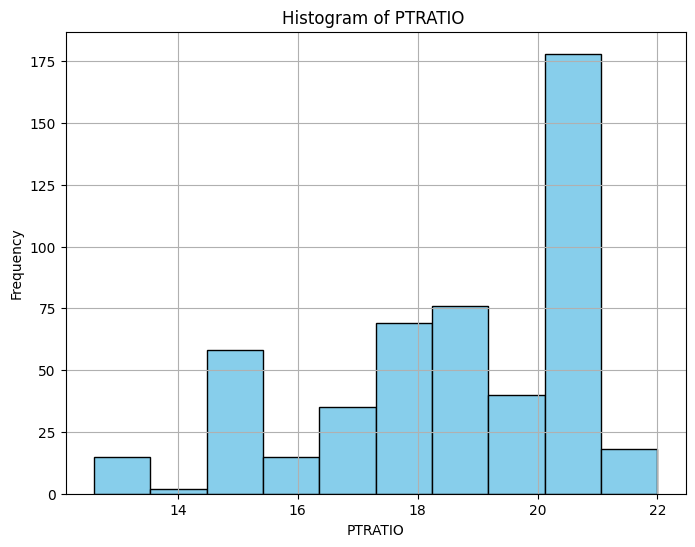

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of PTRATIO ')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Task 3

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [10]:
# Splitting DataFrame based on values of column CHAS
group_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

In [11]:
t_statistic, p_value = scipy.stats.ttest_ind(group_0, group_1)

In [12]:
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -3.996437466090509
P-Value: 7.390623170519905e-05


In [13]:
# Checking significance
print("Our null hypothesis is: there is no significant difference between the median values of houses bounded by the Charles river and not")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the median values of houses bounded by the Charles river and not.")
else:
    print("Fail to reject the null hypothesis: there is no significant difference between the median values of houses bounded by the Charles river and not.")

Our null hypothesis is: there is no significant difference between the median values of houses bounded by the Charles river and not
Reject the null hypothesis: There is a significant difference between the median values of houses bounded by the Charles river and not.


2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [14]:
# Creating different groups
group_1 = boston_df[boston_df['AGE_group']=='35 and younger']['MEDV']
group_2 = boston_df[boston_df['AGE_group']=='Between 35 and 70']['MEDV']
group_3 = boston_df[boston_df['AGE_group']=='70 and older']['MEDV']

# Performing ANOVA test
f_statistic, p_value = scipy.stats .f_oneway(group_1, group_2, group_3)

# Outputting the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Checking significance
print("Our null hypothesis is: there is no significant difference between the Median values of houses (MEDV) for different AGE group")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the Median values of houses (MEDV) for different AGE group")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the Median values of houses (MEDV) for different AGE group")

F-Statistic: 36.40764999196599
P-Value: 1.7105011022702984e-15
Our null hypothesis is: there is no significant difference between the Median values of houses (MEDV) for different AGE group
Reject the null hypothesis: There is a significant difference between the Median values of houses (MEDV) for different AGE group


3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [15]:
# Performing Pearson correlation test
correlation_coefficient, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Outputting the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

# Checking significance
print("Our null hypothesis is: there is no significant correlation between NOX and INDUS")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7636514469209151
P-Value: 7.913361061238693e-98
Our null hypothesis is: there is no significant correlation between NOX and INDUS
Reject the null hypothesis: There is a significant correlation between NOX and INDUS.


We cannot conclude that there is no relationship between NOX and INDUS.

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [16]:
# Adding a constant term to the independent variable DIS
X = sm.add_constant(boston_df['DIS'])

# Performing linear regression
model = sm.OLS(boston_df['MEDV'], X).fit()

# Outputting the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        21:49:13   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Some interpretations:
1. The R-squared value is 0.062, indicating that approximately 6.2% of the variance in the dependent variable (MEDV) is explained by the independent variable (DIS). This suggests that the model explains a small proportion of the variability in the housing prices.
2. The coefficient for the independent variable DIS is 1.0916. This indicates that, on average, for each unit increase in the DIS variable, the predicted value of the dependent variable MEDV increases by approximately 1.0916 units.
3. The p-value associated with the coefficient for DIS is less than 0.05 (p < 0.05), indicating that the coefficient is statistically significant. Therefore, we can conclude that there is a statistically significant relationship between the DIS variable and the MEDV variable.